# ALGORITMO DE SHOR

Queremos encontrar el periodo de la función $f(i)=x^i \mod (N)$, con ayuda de la QFT.
\
El periodo es el mínimo entero $r$ tal que un número $x \in$ (2,N-1) es congruente con $1$ módulo N.
\
Es decir, $r$ es el periodo de $x \in$ (2,N-1) si $x^r \equiv 1 \mod N$


Tenemos que x es una raiz cuadrada no trivial de $N = pq$, con $p$ y $q$ primos si
- x $\in (2, N-1)$
- $x^2 \equiv 1 \mod (N)$
\
Así, buscamos raices no triviales, es sificiente con periodo par. 
\
Tenemos lo siguiente:

$$x^2 - 1 \equiv 0 \mod N \Rightarrow (x+1)(x-1) \equiv 0 \mod N$$
\
Podemos tomar los factores de (x-1) y (x+1) de la siguinte manera:
$$(x-1) = x_1 \cdot x_2 \cdot  \dotsc \cdot  x_n$$
$$(x+1) = y_1 \cdot y_2 \cdot  \dotsc \cdot  y_n$$
\
Claro que p y q se encuentran en uno de estos factores, pero no existe la posibilidad de que p y q se encuntren ambos en $(x-1)$ o ambos en $(x+1)$.
\
Tenemos que $(x+1)<N$ y $(x-1)<N$, entonces calculamos lo siguiente:
\
$$mcd(x-1,N) \text{ y }  mcd(x+1,N)$$
\
Éstos serán los factores primos de nuestro número N.

EJEMPLO: Factorizar 15 como producto de primos.
- Tomamos al azar un  número en (2, 15-2) = (2,13)
- Calculamos su periodo usando la función $f(x) = 7^x \mod 15 $. 
- Vemos si tiene orden 2 o par con ayuda de la QFT.
- Obtenemos los factores primos
- Calculamos $mcd(x-1,15) \text{ y }  mcd(x+1,15)$

## Programar el algoritmo de Shor

In [3]:
from qiskit import *
from qiskit.visualization import plot_histogram
from math import pi

In [4]:
def _7mod15():
        
    circ = QuantumCircuit(8)
    circ.x(4)
    circ.cx(0,5)
    circ.cx(0,6)
    circ.cx(1,4)
    circ.cx(1,6)
    for i in range(4,8):
        circ.ccx(0,1,i)
    gate = circ.to_gate()
    gate.name = "7^x mod 15"
    return gate

In [5]:
def QFT(n):
    qft_circ = QuantumCircuit(n)
    for i in range(n-1, -1, -1):
        qft_circ.h(i)
        
        for j in range(i - 1, -1, -1): 
            qft_circ.cu1(pi/(2 ** (i - j)), j, i)
 
        
    for i in range(n // 2):
        qft_circ.swap(i, n - i - 1)
    gate = qft_circ.to_gate()
    gate.name = "QFT" + str(n)
    return  gate

/var/folders/4p/fdj6h8qx6mz3y02dqg11dsjw0000gp/T/ipykernel_977/2020941756.py:7: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qft_circ.cu1(pi/(2 ** (i - j)), j, i)


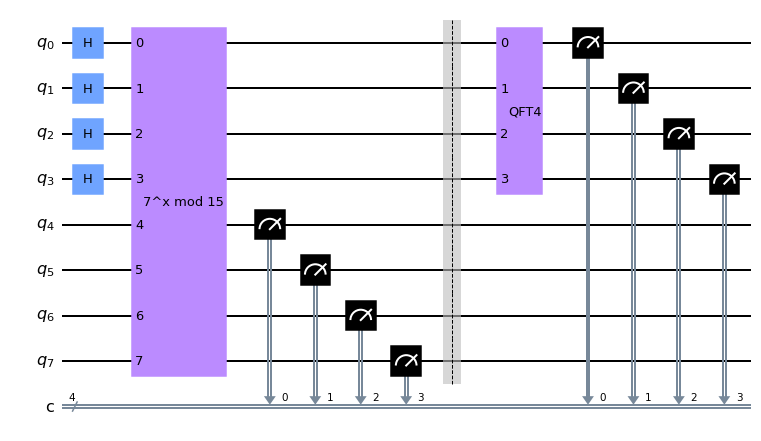

In [6]:
circ = QuantumCircuit(8,4)
circ.h(range(4))
circ.append(_7mod15(), range(8))
circ.measure(range(4,8),range(4))
circ.barrier(range(8))
circ.append(QFT(4), range(4))
circ.measure(range(4), range(4))
circ.draw(output = 'mpl')

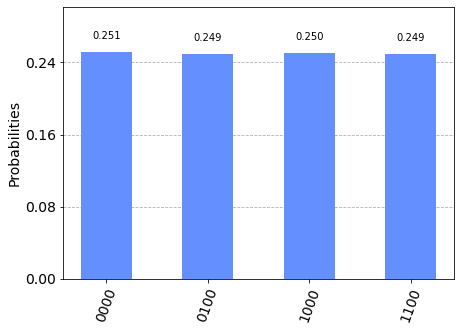

In [7]:
backend = Aer.get_backend("qasm_simulator")
job = execute(circ, backend, shots = 100000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [8]:
# con esto sabemos que 4 es raiz cuadrada ya que el mcd de 4 8 12 es 4
# sabiendo esto podemos calcular los factores primos de la siguiente manera:

import math

primer_factor = math.gcd(4-1, 15)
segundo_factor = math.gcd(4+1, 15)
print("factores primos:", primer_factor, segundo_factor)


factores primos: 3 5


In [ ]:
def _xmodN():
        
    circ = QuantumCircuit(8)
    circ.x(4)
    circ.cx(0,5)
    circ.cx(0,6)
    circ.cx(1,4)
    circ.cx(1,6)
    for i in range(4,8):
        circ.ccx(0,1,i)
    gate = circ.to_gate()
    gate.name = "7^x mod 15"
    return gate

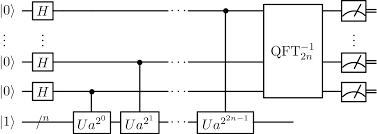